In [1]:
import pickle as pkl
from matplotlib import pyplot as plt
import numpy as np

In [2]:
sae_types = ['ReLU', 'JumpReLU', 'TopK', 'SpaDE']
pos_keys = ['Noun', 'Verb', 'Adv.', 'Adj.', 'Conj.']

In [3]:
sae_colors = {
    'ReLU': '#A2E634',
    'JumpReLU': '#3B81F6',
    'TopK': '#FDE046',
    'SpaDE': '#8B5CF7',
}

#### Preprocessing

In [4]:
results = pkl.load(open('results.pkl', 'rb'))

In [5]:
variance_remaining = {}
nmse = {}
L0 = {}
percent_dead = {}
stable_rank_data = {}
stable_rank_latents = {}
mean_monosemanticity = {}
std_monosemanticity = {}
f1_scores_per_concept = {}
sort_idx = {}

posL0 = {}
pos_variance_remaining = {}
pos_nmse = {}
pos_percent_dead = {}

for sae_type in sae_types:
    L0[sae_type] = []
    nmse[sae_type] = []
    variance_remaining[sae_type] = []
    percent_dead[sae_type] = []
    stable_rank_data[sae_type] = []
    stable_rank_latents[sae_type] = []
    mean_monosemanticity[sae_type] = []
    std_monosemanticity[sae_type] = []
    f1_scores_per_concept[sae_type] = []
    posL0[sae_type] = {pos: [] for pos in pos_keys}
    pos_nmse[sae_type] = {pos: [] for pos in pos_keys}
    pos_variance_remaining[sae_type] = {pos: [] for pos in pos_keys}
    pos_percent_dead[sae_type] = {pos: [] for pos in pos_keys}

    for hparam in results[sae_type].keys():
        L0[sae_type].append(results[sae_type][hparam]['L0'])
        nmse[sae_type].append(results[sae_type][hparam]['nmse'])
        variance_remaining[sae_type].append(results[sae_type][hparam]['variance_remaining'])
        percent_dead[sae_type].append(results[sae_type][hparam]['percent_dead'])
        stable_rank_data[sae_type].append(results[sae_type][hparam]['stable_rank_data'])
        stable_rank_latents[sae_type].append(results[sae_type][hparam]['stable_rank_latents'])
        mean_monosemanticity[sae_type].append(results[sae_type][hparam]['mean_monosemanticity'])
        std_monosemanticity[sae_type].append(results[sae_type][hparam]['std_monosemanticity'])
        f1_scores_per_concept[sae_type].append(results[sae_type][hparam]['f1_scores'])
    
    # Sorting order
    sort_idx = np.argsort(L0[sae_type])

    # Fill in the per-pos data
    for pos in pos_keys:
        for hparam in results[sae_type].keys():
                posL0[sae_type][pos].append(results[sae_type][hparam]['per_pos_results'][pos]['L0'])
                pos_nmse[sae_type][pos].append(results[sae_type][hparam]['per_pos_results'][pos]['nmse'])
                pos_variance_remaining[sae_type][pos].append(results[sae_type][hparam]['per_pos_results'][pos]['variance_remaining'])
                pos_percent_dead[sae_type][pos].append(results[sae_type][hparam]['per_pos_results'][pos]['percent_dead'])
        
        # Sort per-pos data
        posL0[sae_type][pos] = np.array([posL0[sae_type][pos][i] for i in sort_idx])
        pos_nmse[sae_type][pos] = np.array([pos_nmse[sae_type][pos][i] for i in sort_idx])
        pos_variance_remaining[sae_type][pos] = np.array([pos_variance_remaining[sae_type][pos][i] for i in sort_idx])
        pos_percent_dead[sae_type][pos] = np.array([pos_percent_dead[sae_type][pos][i] for i in sort_idx]) / 100

    # Sort all data
    L0[sae_type] = np.array([L0[sae_type][i] for i in sort_idx])
    nmse[sae_type] = np.array([nmse[sae_type][i] for i in sort_idx])
    variance_remaining[sae_type] = np.array([variance_remaining[sae_type][i] for i in sort_idx])
    percent_dead[sae_type] = np.array([percent_dead[sae_type][i] for i in sort_idx]) / 100
    stable_rank_data[sae_type] = np.array([stable_rank_data[sae_type][i] for i in sort_idx])
    stable_rank_latents[sae_type] = np.array([stable_rank_latents[sae_type][i] for i in sort_idx])
    mean_monosemanticity[sae_type] = np.array([mean_monosemanticity[sae_type][i] for i in sort_idx])
    std_monosemanticity[sae_type] = np.array([std_monosemanticity[sae_type][i] for i in sort_idx])
    f1_scores_per_concept[sae_type] = np.array([f1_scores_per_concept[sae_type][i] for i in sort_idx])

#### Plots

In [6]:
axisfont = 14
tickfont = 14
labelfont = 16
linewidth = 2

##### Variance explained / NMSE

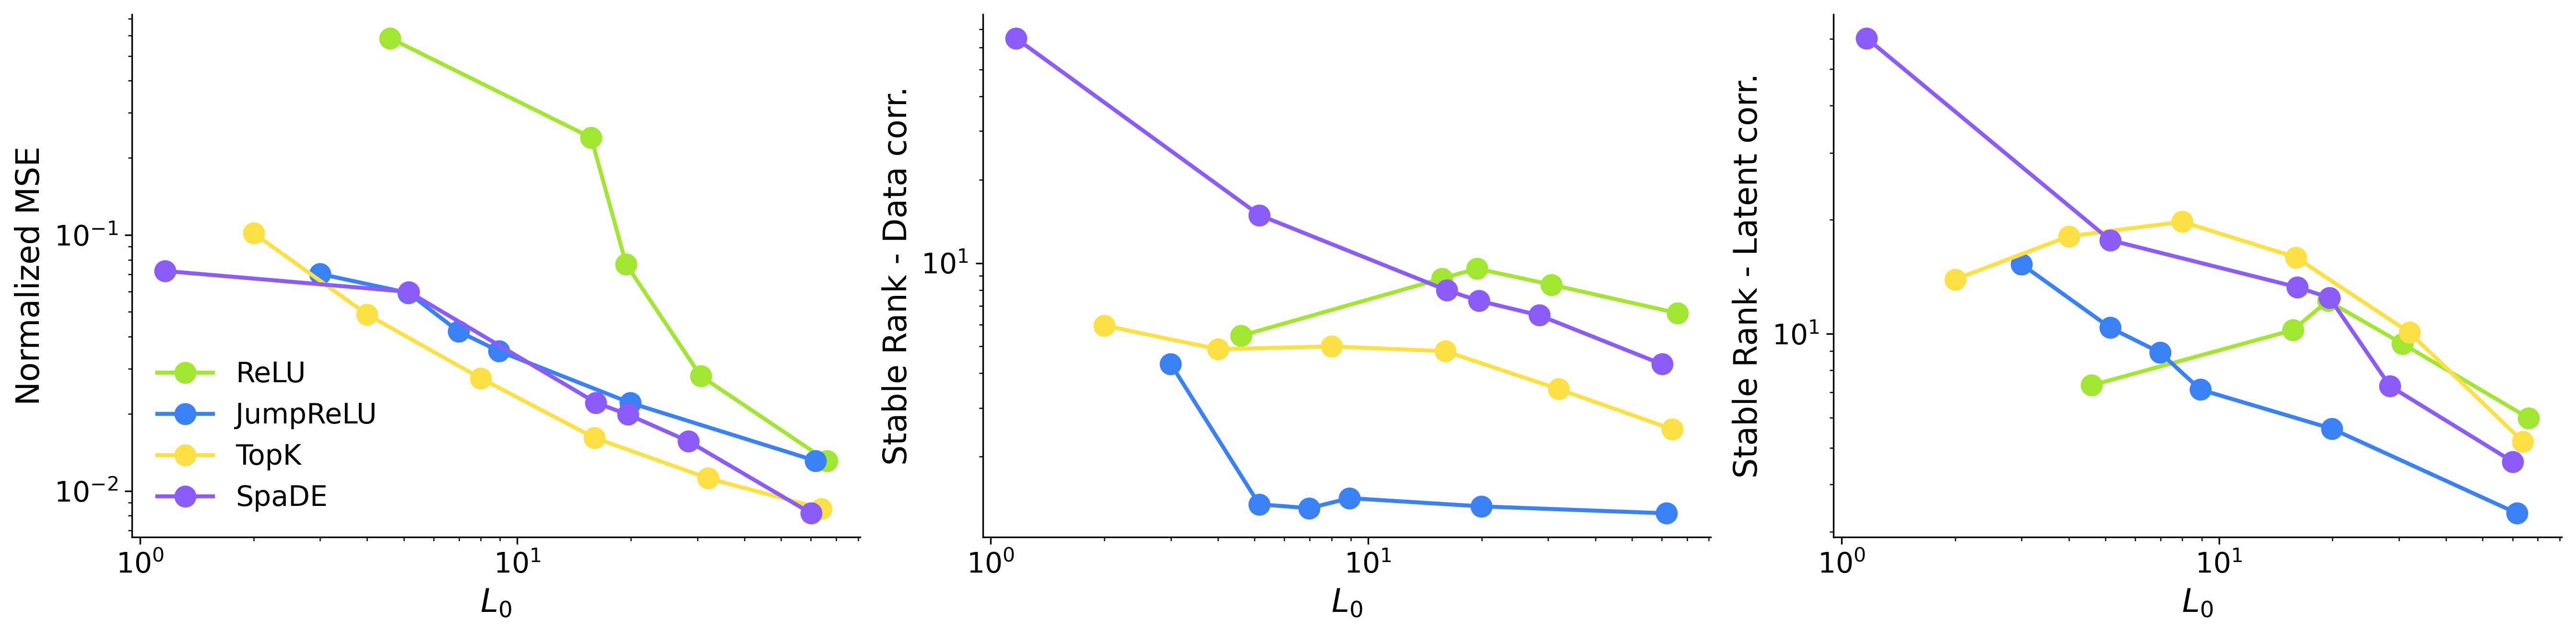

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4.5), dpi=300, sharex=True)
for sae_type in sae_types:
    axs[0].plot(L0[sae_type], nmse[sae_type], label=sae_type, marker='o',
            linestyle='-', markersize=10, color=sae_colors[sae_type], linewidth=linewidth)
    axs[1].plot(L0[sae_type], stable_rank_data[sae_type], label=sae_type, marker='o',
            linestyle='-', markersize=10, color=sae_colors[sae_type], linewidth=linewidth)
    axs[2].plot(L0[sae_type], stable_rank_latents[sae_type], label=sae_type, marker='o',
            linestyle='-', markersize=10, color=sae_colors[sae_type], linewidth=linewidth)

# Set log scale
for ax in axs:
    ax.set_xscale('log')
    ax.set_yscale('log')

    # Set ticks
    ax.tick_params(axis='x', which='major', labelsize=tickfont)
    ax.tick_params(axis='y', which='major', labelsize=tickfont)

    # Set labels
    ax.set_xlabel(r'$L_0$', fontsize=labelfont)

    # Top and right axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axs[0].set_ylabel('Normalized MSE', fontsize=labelfont)
axs[1].set_ylabel('Stable Rank - Data corr.', fontsize=labelfont)
axs[2].set_ylabel('Stable Rank - Latent corr.', fontsize=labelfont)

# axs[0].legend(fontsize=labelfont, frameon=False, loc=[0.5,1], ncol=4)
axs[0].legend(fontsize=labelfont-2, loc='lower left', ncol=1, frameon=False)

plt.tight_layout()
plt.savefig('fl_fidelity.png', dpi=300, bbox_inches='tight')
plt.show()

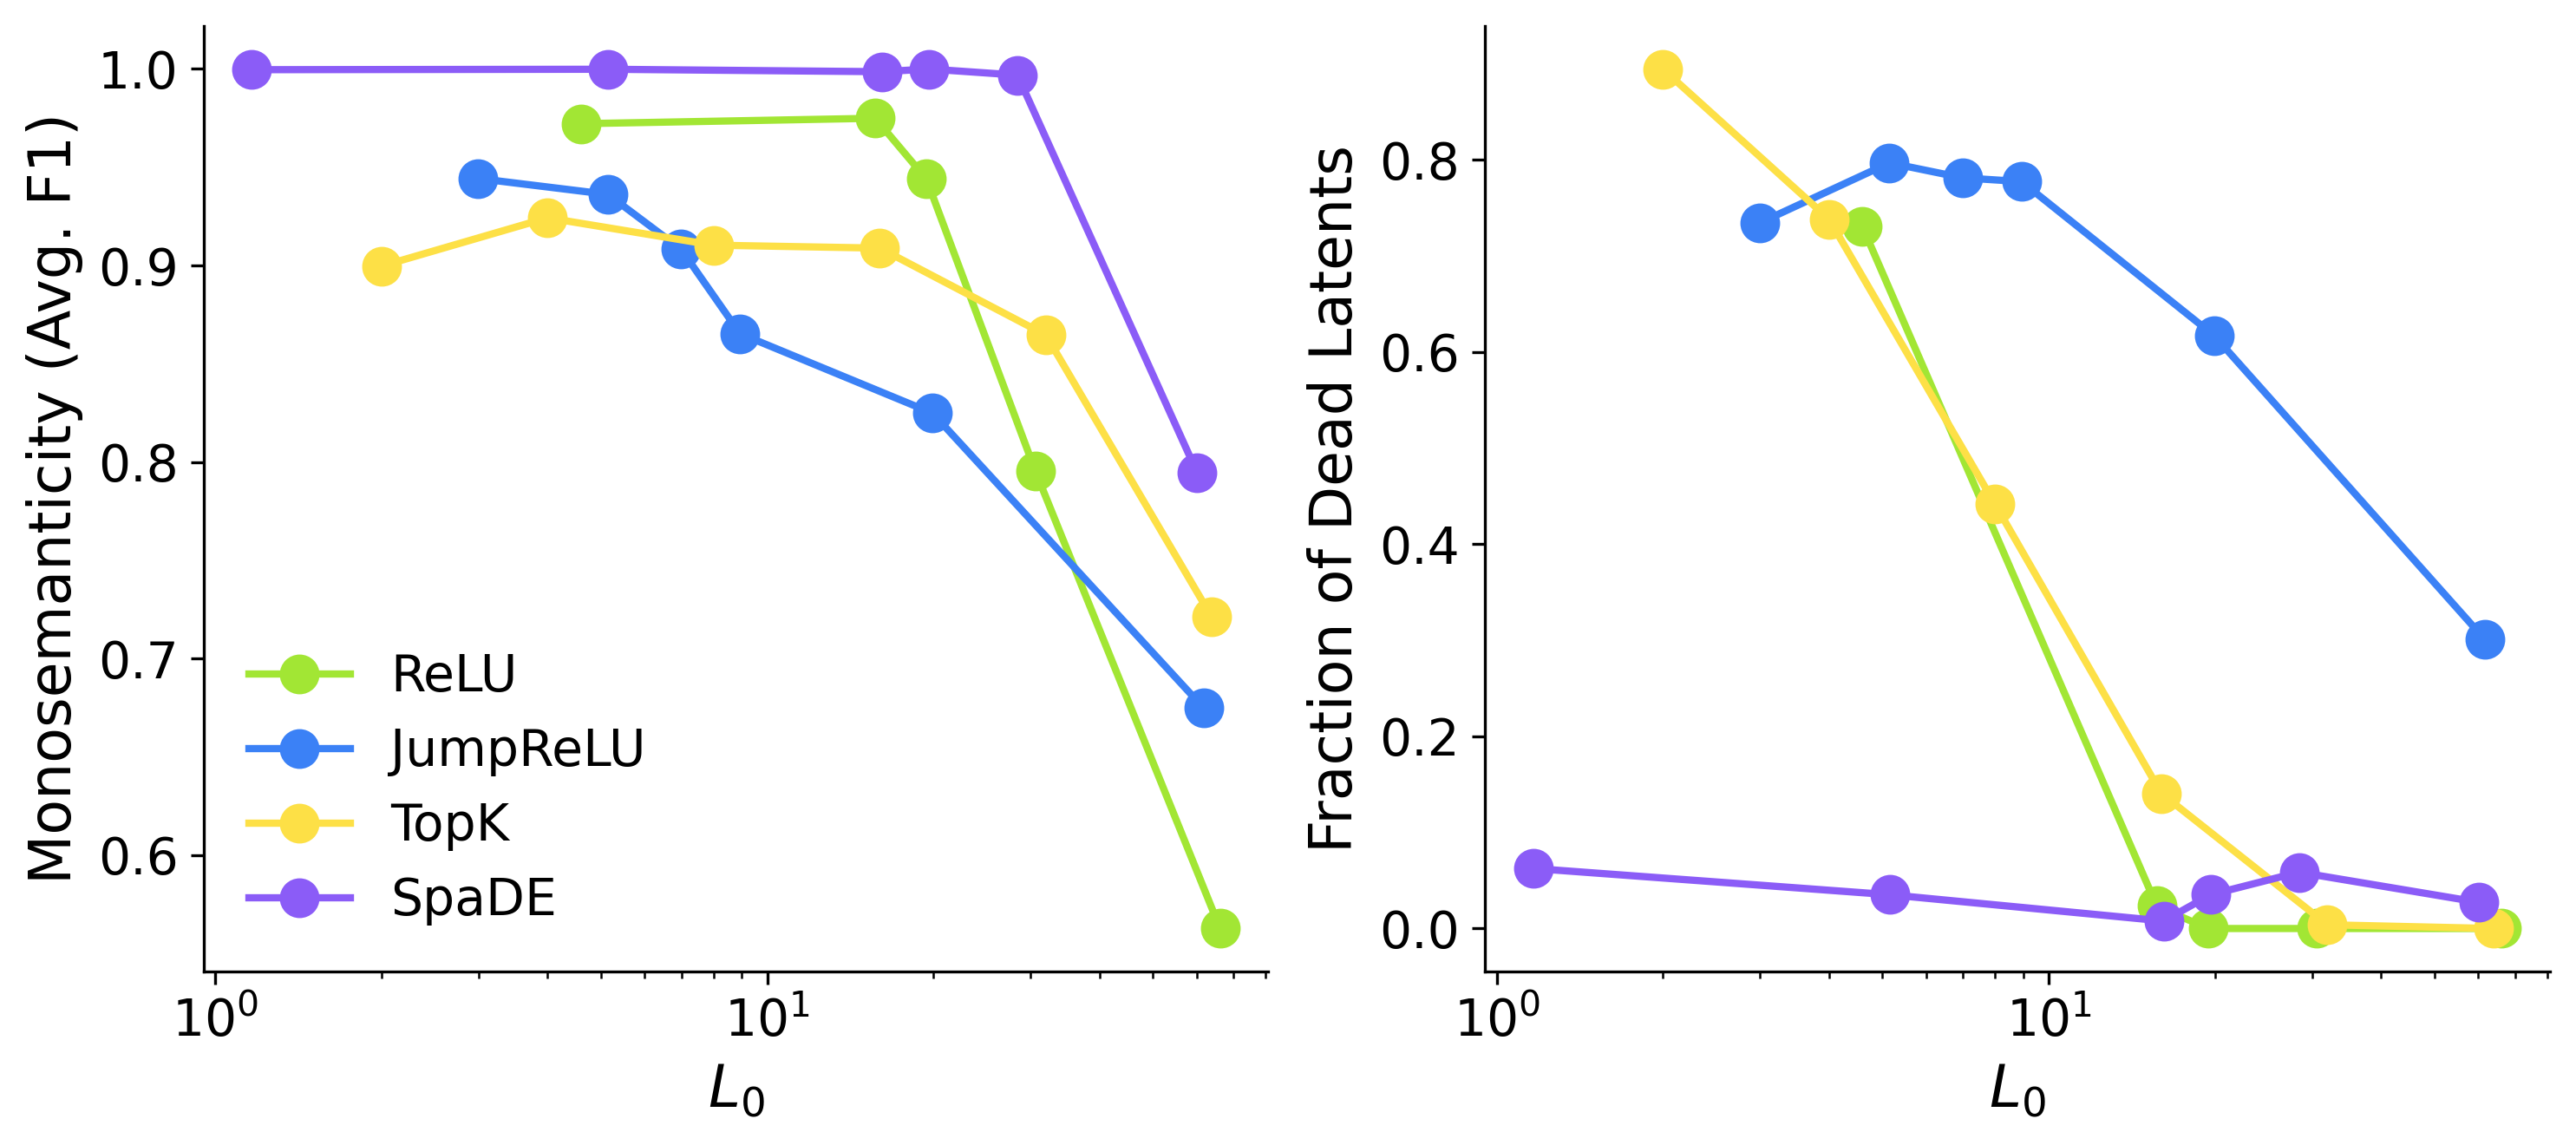

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4.5), dpi=300, sharex=True)
for sae_type in sae_types:
    axs[0].plot(L0[sae_type], mean_monosemanticity[sae_type], label=sae_type, marker='o',
            linestyle='-', markersize=10, color=sae_colors[sae_type], linewidth=linewidth)
    axs[1].plot(L0[sae_type], percent_dead[sae_type], label=sae_type, marker='o',
            linestyle='-', markersize=10, color=sae_colors[sae_type], linewidth=linewidth)

# Set log scale
for ax in axs:
    ax.set_xscale('log')

    # Set ticks
    ax.tick_params(axis='x', which='major', labelsize=tickfont)
    ax.tick_params(axis='y', which='major', labelsize=tickfont)

    # Set labels
    ax.set_xlabel(r'$L_0$', fontsize=labelfont)

    # Top and right axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axs[0].set_ylabel('Monosemanticity (Avg. F1)', fontsize=labelfont)
axs[1].set_ylabel('Fraction of Dead Latents', fontsize=labelfont)

# axs[0].legend(fontsize=labelfont, frameon=False, loc=[0.5,1], ncol=4)
axs[0].legend(fontsize=labelfont-2, loc='lower left', ncol=1, frameon=False)

plt.tight_layout()
plt.savefig('fl_f1_dead_latents.png', dpi=300, bbox_inches='tight')
plt.show()

#### Per PoS Results

In [9]:
axisfont = 16
tickfont = 16
labelfont = 20
linewidth = 2

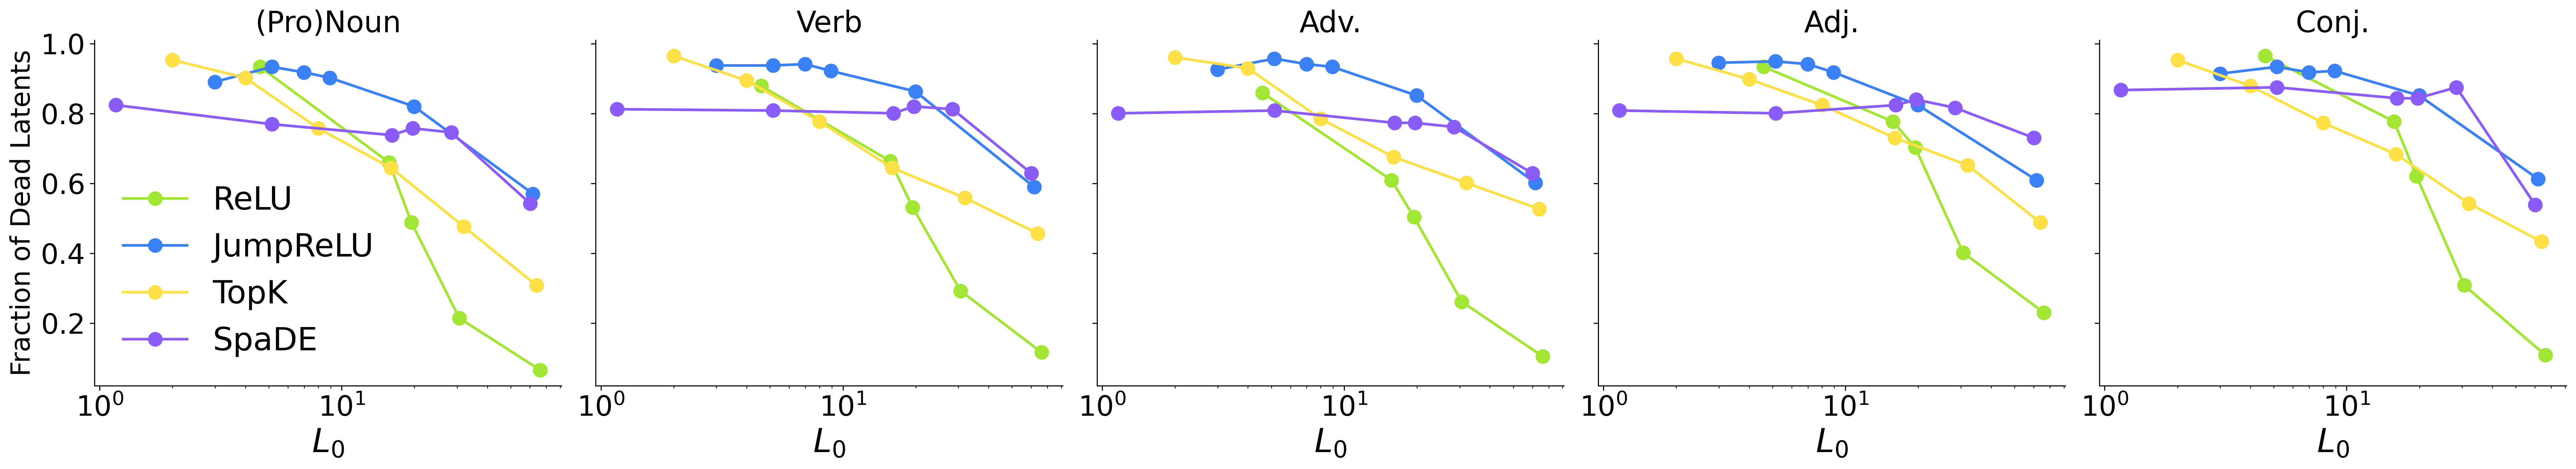

In [10]:
fig, axs = plt.subplots(1, 5, figsize=(27, 5), dpi=300, sharex=True, sharey=True)
for sae_type in sae_types:
    for i, pos in enumerate(pos_keys):
        axs[i].plot(L0[sae_type], pos_percent_dead[sae_type][pos], label=sae_type, marker='o', 
                linestyle='-', markersize=10, color=sae_colors[sae_type], linewidth=linewidth)
        axs[i].set_title('(Pro)Noun' if pos == 'Noun' else pos, fontsize=labelfont+2)

# Set log scale
for i, ax in enumerate(axs.flatten()):
    ax.set_xscale('log')

    # Set ticks
    ax.tick_params(axis='x', which='major', labelsize=tickfont+5)
    ax.tick_params(axis='y', which='major', labelsize=tickfont+5)
    
    # Set labels
    ax.set_xlabel(r'$L_0$', fontsize=labelfont+5)

    # Top and right axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axs[0].set_ylabel('Fraction of Dead Latents', fontsize=labelfont)
axs[0].legend(fontsize=labelfont+4, loc='lower left', ncol=1, frameon=False)

plt.tight_layout()
plt.savefig('fl_per_pos_dead_latents.png', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
with open(f'per_concept_acts_svals.pkl', 'rb') as f:
    per_concept_svals = pkl.load(f)

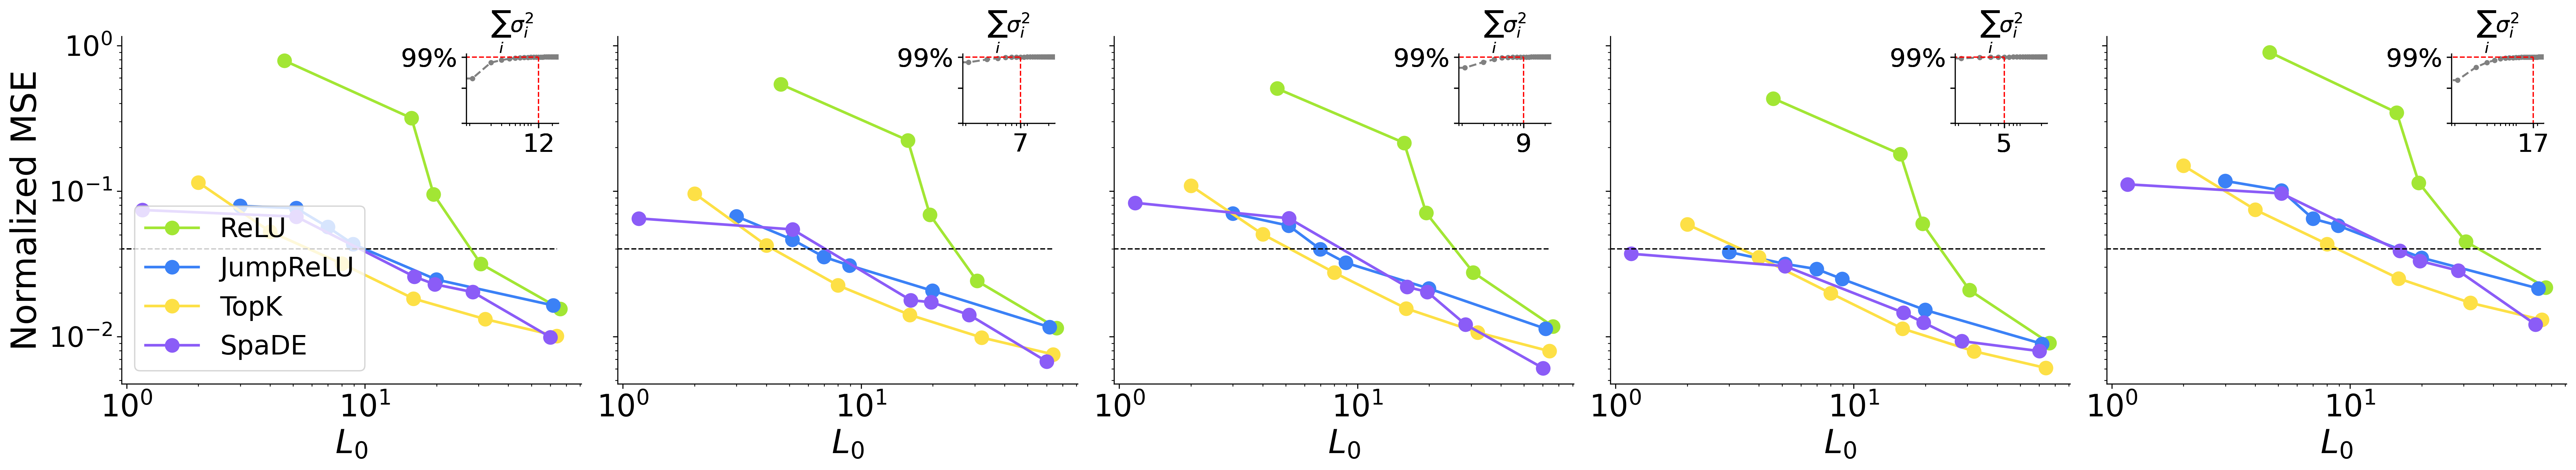

In [15]:
fig, axs = plt.subplots(1, 5, figsize=(27, 5), dpi=300, sharex=True, sharey=True)
s_thresh = 0.999
for sae_type in sae_types:
    for i, pos in enumerate(pos_keys):
        axs[i].plot(L0[sae_type], pos_nmse[sae_type][pos], label=sae_type, marker='o', 
                linestyle='-', markersize=10, color=sae_colors[sae_type], linewidth=linewidth)
        # axs[i].set_title('(Pro)Noun' if pos == 'Noun' else pos, fontsize=labelfont+4)

        # Define an inset plot for the singular values
        inset_ax = axs[i].inset_axes([0.75, 0.75, 0.2, 0.2])
        sigma2 = per_concept_svals[pos]**2
        results_to_plot = np.cumsum(sigma2) / sigma2.sum()
        inset_ax.plot(results_to_plot, marker='o', linestyle='--', color='gray', markersize=3)

        # Point where 99% of the variance is explained
        p = np.where(results_to_plot > s_thresh)[0][0]
        inset_ax.vlines(p, 0, s_thresh, color='red', linestyle='--', linewidth=1)
        inset_ax.hlines(s_thresh, 0, p, color='red', linestyle='--', linewidth=1)
        inset_ax.set_xlim([0.8, 25])
        inset_ax.set_ylim([0.8, 1.01])

        inset_ax.set_xscale('log')
        inset_ax.set_yscale('log')

        # Remove ticks
        inset_ax.tick_params(axis='x', which='major', labelsize=tickfont-2)
        inset_ax.tick_params(axis='y', which='major', labelsize=tickfont-2)
        inset_ax.set_xticks([p])
        inset_ax.set_xticklabels([p], fontsize=tickfont+3)
        inset_ax.set_yticks([0.8, 0.9, s_thresh])
        inset_ax.set_yticklabels(['', '', f'{int(s_thresh*100)}%'], fontsize=tickfont+3)
        inset_ax.set_title(r'$\sum_i \sigma_i^2$', fontsize=tickfont)

        # Top and right axis
        inset_ax.spines['top'].set_visible(False)
        inset_ax.spines['right'].set_visible(False) 

# Set log scale
for i, ax in enumerate(axs.flatten()):
    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.hlines(0.04, 1e-1, 64, linestyle='--', color='black', linewidth=linewidth-1)

    # Set ticks
    ax.tick_params(axis='x', which='major', labelsize=tickfont+7)
    ax.tick_params(axis='y', which='major', labelsize=tickfont+5)

    # Set labels
    ax.set_xlabel(r'$L_0$', fontsize=labelfont+5)

    # Top and right axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axs[0].set_ylabel('Normalized MSE', fontsize=labelfont+6)
axs[0].legend(fontsize=labelfont, loc='lower left', ncol=1, frameon=True)

plt.tight_layout()
plt.savefig('fl_per_pos_fidelity.png', dpi=300, bbox_inches='tight')
plt.show()

In [13]:
per_concept_f1 = {pos: {sae_type: {'mean': [], 'std': []} for sae_type in sae_types} for pos in pos_keys}
for sae_type in sae_types:
    for n_seeds in range(len(f1_scores_per_concept[sae_type])):
        for pos in pos_keys:
            per_concept_f1[pos][sae_type]['mean'].append(f1_scores_per_concept[sae_type][n_seeds][pos]['mean'])
            per_concept_f1[pos][sae_type]['std'].append(f1_scores_per_concept[sae_type][n_seeds][pos]['std'])

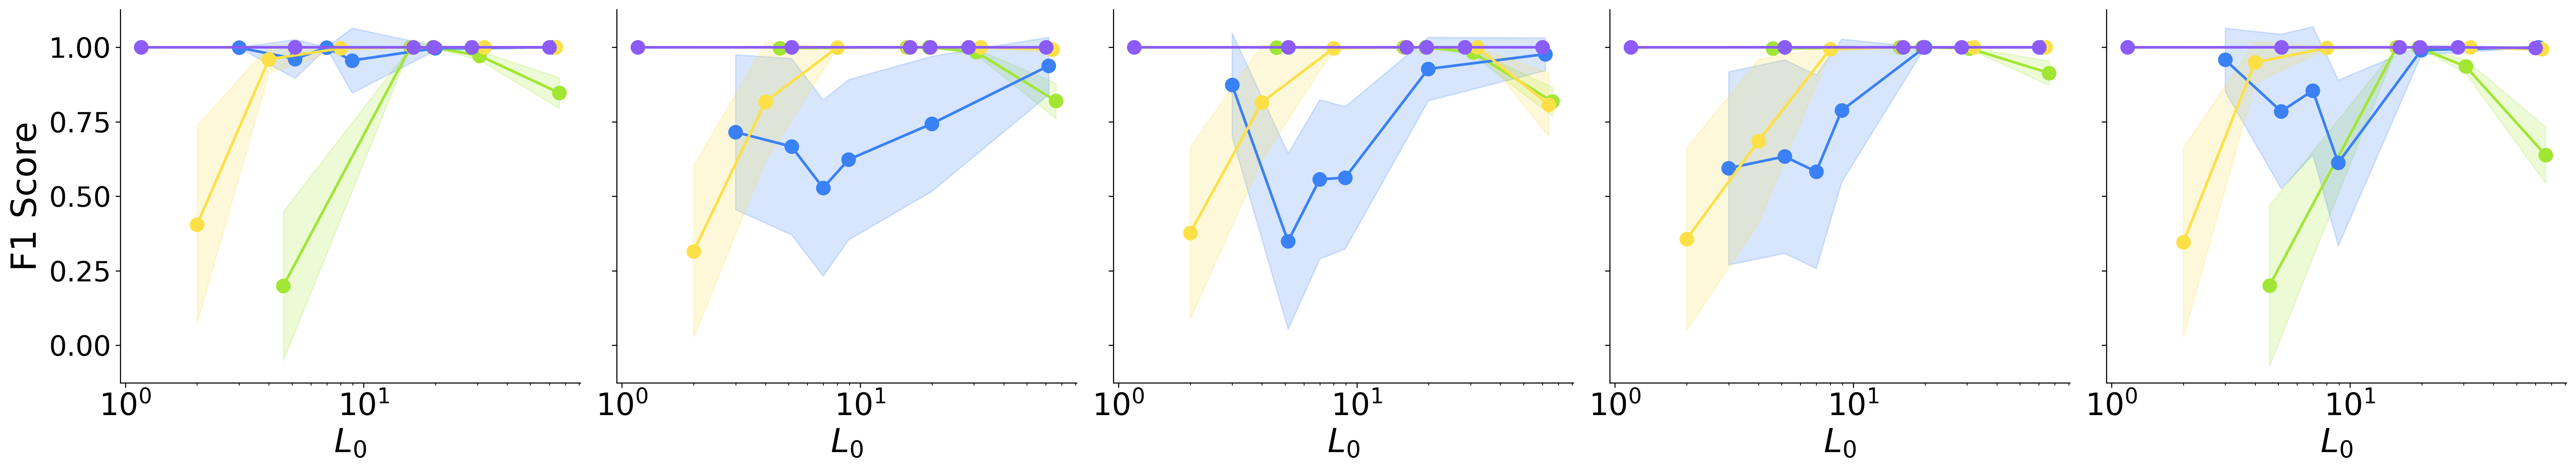

In [14]:
fig, axs = plt.subplots(1, 5, figsize=(27, 5), dpi=300, sharex=True, sharey=True)
for sae_type in sae_types:
    for i, pos in enumerate(pos_keys):
        axs[i].plot(L0[sae_type], per_concept_f1[pos][sae_type]['mean'], label=sae_type, marker='o', 
                linestyle='-', markersize=10, color=sae_colors[sae_type], linewidth=linewidth)
        axs[i].fill_between(L0[sae_type], np.array(per_concept_f1[pos][sae_type]['mean']) - 0.7*np.array(per_concept_f1[pos][sae_type]['std']),
                                    np.array(per_concept_f1[pos][sae_type]['mean']) + 0.7*np.array(per_concept_f1[pos][sae_type]['std']), alpha=0.2, color=sae_colors[sae_type])
        # axs[i].set_title('(Pro)Noun' if pos == 'Noun' else pos, fontsize=labelfont+2)

# Set log scale
for i, ax in enumerate(axs.flatten()):
    ax.set_xscale('log')

    # Set ticks
    ax.tick_params(axis='x', which='major', labelsize=tickfont+7)
    ax.set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
    ax.tick_params(axis='y', which='major', labelsize=tickfont+5)

    # Set labels
    ax.set_xlabel(r'$L_0$', fontsize=labelfont+5)

    # Top and right axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axs[0].set_ylabel('F1 Score', fontsize=labelfont+6)
# axs[0].legend(fontsize=labelfont+4, loc='lower left', ncol=1, frameon=False)

plt.tight_layout()
plt.savefig('fl_per_pos_f1.png', dpi=300, bbox_inches='tight')
plt.show()